# EP2


Daniel Angelo Esteves Lawand - 10297693 \\
Miguel Ostrowski - 10723610


## Parte 1
Modelo em uma ilha

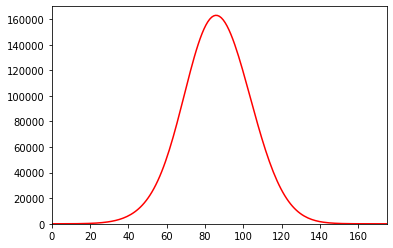

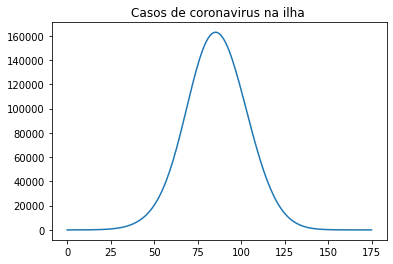

In [90]:
import math
import matplotlib.pyplot as pyplot
import csv
import numpy as np
from matplotlib.animation import FuncAnimation,FFMpegFileWriter

def nextEuler(N, dN, dt):
  return (N + dN*dt)

# v é o vetor unidimensional que mostra a evolução do virus
v = []

# parametros para criar a imagem dinamica
fig, ax = pyplot.subplots()
xdata, ydata = [], []
ln, = pyplot.plot([], [], 'r', animated=True)
f = np.linspace(0, 175, 175)

def init():
    ax.set_xlim(0, 175)
    ax.set_ylim(0, 170000)
    ln.set_data(xdata,ydata)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(v[int(frame)])
    ln.set_data(xdata, ydata)
    return ln,

def main():
  #Utilizamos os parâmetros referentes à Itália retirados do artigo do soninno
  
  #Fator de crescimento
  alpha = 0.2

  lambida = 0.0013

  # Tempo dia em que foi implantada o lockdown
  t_0 = 80.6

  # Tempo entre as simulações (em dias)
  dt = 1

  # Tempo final da simulação
  t_final = 175

  # Número de pessoas infectadas inicialmente
  N = 1

  #'A' é um parâmetro que depende do vı́rus e das medidas de restrição.
  A = 2135.65

  n = 2*A/t_0

  t = 0
  while (t <= t_final):
    v.append(N)

    t = t+dt

    dN = alpha*(1-N/(n*t**2))*N - (((2*lambida*t**2)-1)/t - ((lambida*t_0**2)/t)*math.exp(-lambida*(t-t_0)**2))*N

    N = nextEuler(N, dN, dt)

  ## faz o video dinamico
  ani = FuncAnimation(fig, update, frames=f,
                    init_func=init, blit=True, interval = 2.5,repeat=False)

  with open('Parte_1.csv', 'w', newline='') as csvfile:  
      c = csv.writer(csvfile)
      c.writerow(v)

  ## salva o video do grafico dinamico
  mywriter = FFMpegFileWriter(fps=25,codec="libx264")
  ani.save("grafico_dinamico_Parte1.mp4", writer=mywriter)

  pyplot.figure(0)
  pyplot.plot(v, label='Numero de casos')
  pyplot.title('Casos de coronavirus na ilha ')
  pyplot.show(block=False)


main()

##Parte 2
Modelo para as 5 ilhas

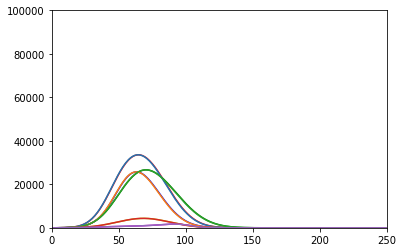

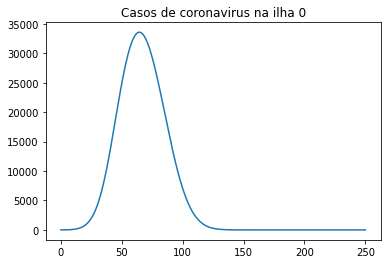

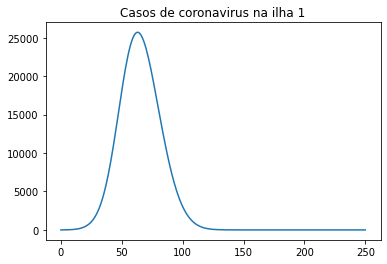

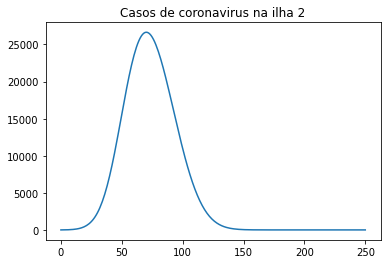

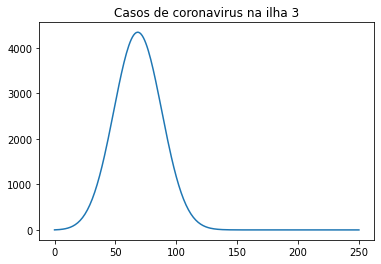

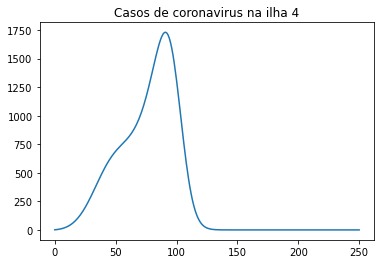

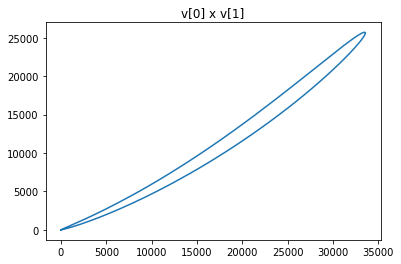

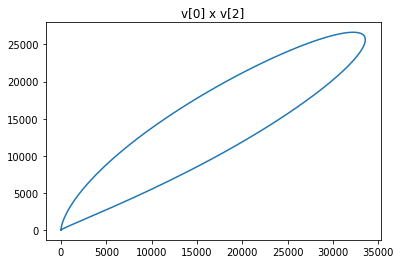

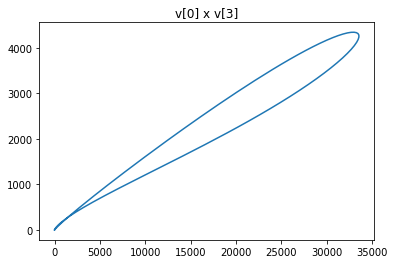

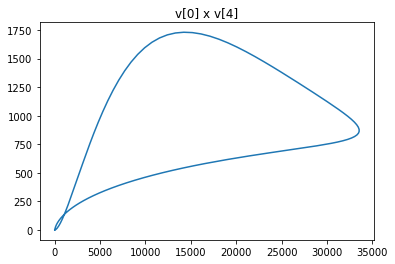

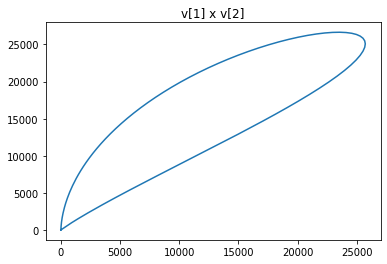

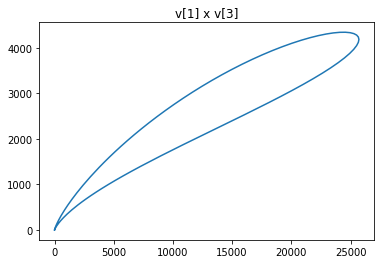

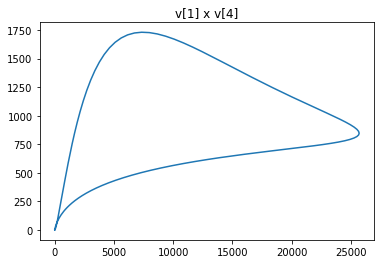

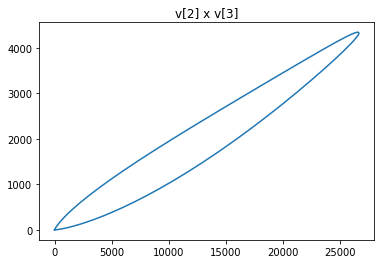

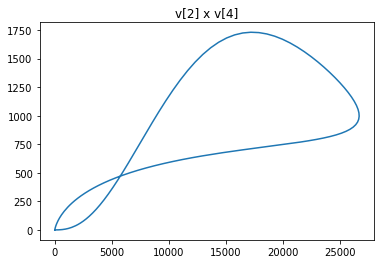

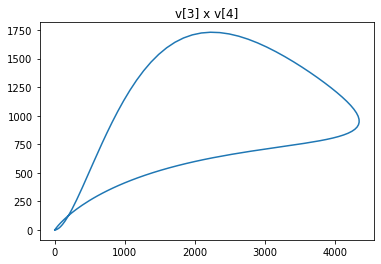

In [89]:
import math
from math import floor
import matplotlib.pyplot as pyplot
import csv
import random

# bibiliotecas para fazer o os graficos dinamicos
import numpy as np
from matplotlib.animation import FuncAnimation,FFMpegFileWriter

def nextEuler(N, dN, dt):
  return (N + dN*dt)

# parametros para criar a imagem dinamica
fig, ax = pyplot.subplots()
xdata0, ydata0 = [], []
xdata1, ydata1 = [], []
xdata2, ydata2 = [], []
xdata3, ydata3 = [], []
xdata4, ydata4 = [], []
ln0, = pyplot.plot([], [], 'r', animated=True)
ln1, = pyplot.plot([], [], 'b', animated=True)
ln2, = pyplot.plot([], [], 'g', animated=True)
ln3, = pyplot.plot([], [], 'y', animated=True)
ln4, = pyplot.plot([], [], 'm', animated=True)
f = np.linspace(0, 250, 250)
Ymax = 100000
Xmax = []

for i in range(251):
  Xmax.append(i)

# Vetor que mostra a evolução do virus em cada ilha
v = [[],[],[],[],[]]

def init():
    ax.set_xlim(0, 250)
    ax.set_ylim(0, Ymax)
    ln0.set_data(xdata0,ydata0)
    ln1.set_data(xdata1,ydata1)
    ln2.set_data(xdata2,ydata2)
    ln3.set_data(xdata3,ydata3)
    ln4.set_data(xdata4,ydata4)
    return ln0, ln1, ln2, ln3, ln4,

def update(frame):
    xdata0.append(frame)
    ydata0.append(v[0][int(frame)])

    xdata1.append(frame)
    ydata1.append(v[1][int(frame)])

    xdata2.append(frame)
    ydata2.append(v[2][int(frame)])

    xdata3.append(frame)
    ydata3.append(v[3][int(frame)])

    xdata4.append(frame)
    ydata4.append(v[4][int(frame)])

    ln0.set_data(xdata0, ydata0)
    ln1.set_data(xdata1, ydata1)
    ln2.set_data(xdata2, ydata2)
    ln3.set_data(xdata3, ydata3)
    ln4.set_data(xdata4, ydata4)

    return ln0, ln1, ln2, ln3, ln4,

def main():
  # Tempo entre as simulações (em dias)
  dt = 1

  # Tempo final da simulação
  t_final = 250

  # roda para cada ilha
  for i in range(5):
    # Fator de crescimento cria um numero entre 0.1 e 0.2
    alpha = random.random()/10 + 0.1

    # Parametro lambida
    lambida = random.randrange(9, 18)/10000


    # Tempo dia em que foi implantada o isolamento
    t_0 = random.randrange(1, 100)

    # parametro que depende do instante que foi aplicado o isolamento
    A = random.randrange(800, 1200)

    n = 2.0*A/t_0

    # inicio da pandemia
    t = 0
    # numero de casos iniciais
    N = 1

    # computa a equação por euler
    while (t <= t_final):
      v[i].append(N)

      t = t+dt

      dN = alpha*(1-N/(n*t**2))*N - (((2*lambida*t**2)-1)/t - ((lambida*t_0**2)/t)*math.exp(-lambida*(t-t_0)**2))*N

      N = nextEuler(N, dN, dt)
    t_0 += 10
  # gera o csv
  with open('Parte_2.csv', 'w', newline='') as csvfile:  
      c = csv.writer(csvfile)
      c.writerow(v[0])
      c.writerow(v[1])
      c.writerow(v[2])
      c.writerow(v[3])
      c.writerow(v[4])
  
  ## faz o video dinamico
  ani = FuncAnimation(fig, update, frames=f,
                            init_func=init, blit=True, interval = 2.5,repeat=True)

  ## salva o video do grafico dinamico
  mywriter = FFMpegFileWriter(fps=25,codec="libx264")

  ani.save("grafico_dinamico_Parte2.mp4", writer=mywriter)

  ## graficos juntos
  from pylab import plot, show, legend
  plot(Xmax,v[0],Xmax,v[1],Xmax,v[2],Xmax,v[3],Xmax,v[4])

  # graficos de cada ilha
  for i in range(5):
    pyplot.figure(i)  
    pyplot.plot(v[i], label='Numero de casos')
    pyplot.title('Casos de coronavirus na ilha '+str(i))
    pyplot.show(block=False)

  show()

  # cria os graficos do produto cartesiano de v[0] x v[1],..., v[3] x v[4]
  i = 0
  while i < 5:
    j = i+1
    while j < 5:
      pyplot.figure(5+i*5+j)
      pyplot.plot(v[i], v[j], label='Numero de casos')
      pyplot.title('v['+str(i)+'] x v['+str(j)+']')
      pyplot.show(block=False)
      j = j+1
    i = i+1

main()

#Teste

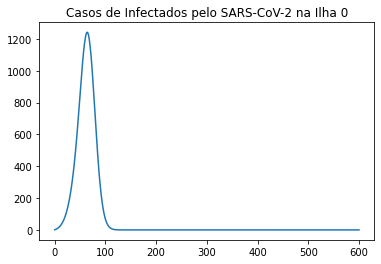

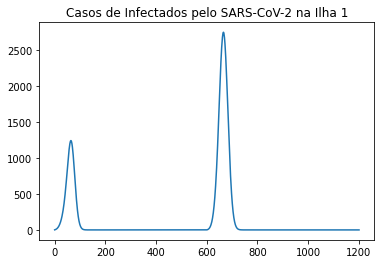

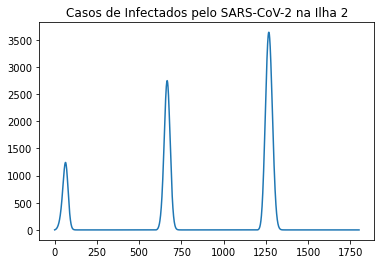

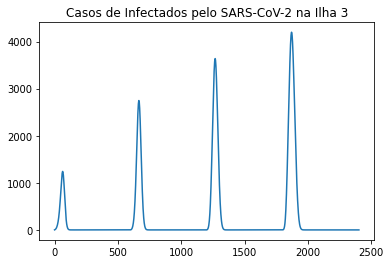

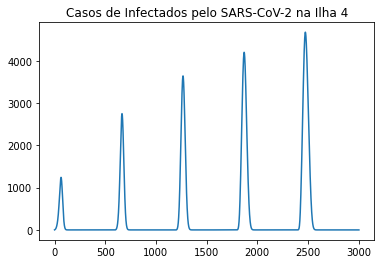

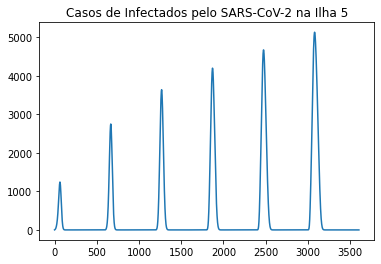

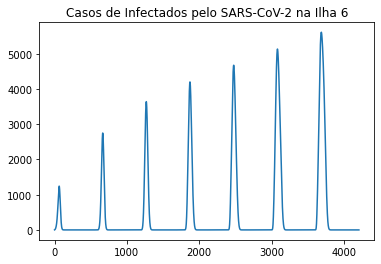

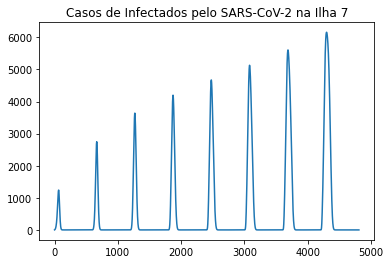

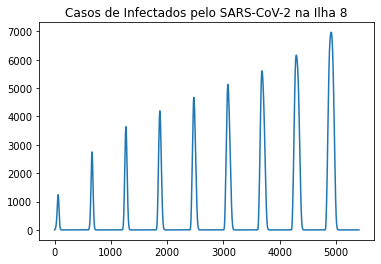

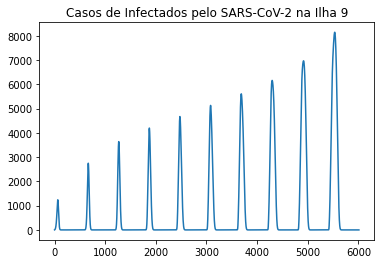

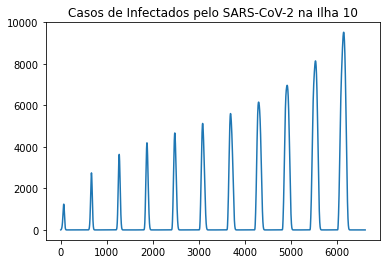

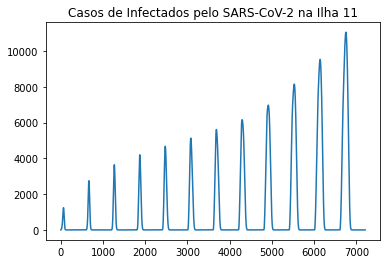

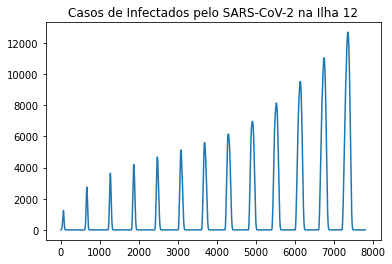

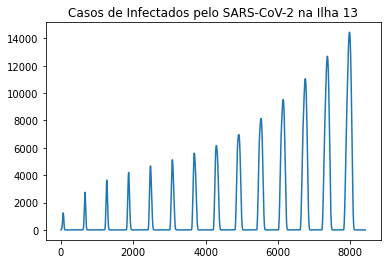

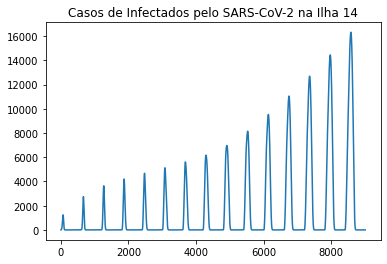

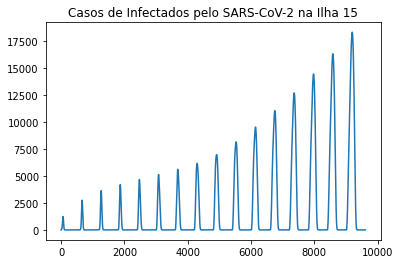

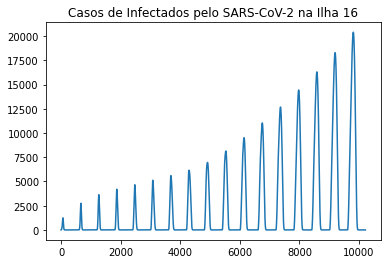

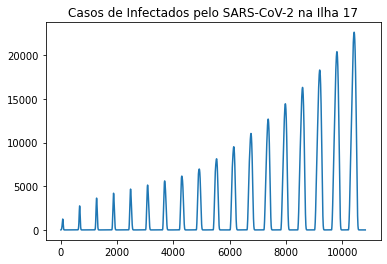

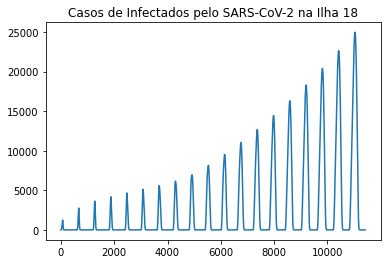

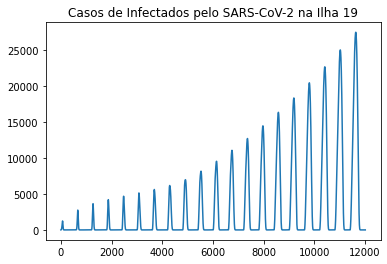

In [ ]:
import math
from math import floor
import matplotlib.pyplot as pyplot
import csv
import random


def nextEuler(N, dN, dt):
  return (N + dN*dt)


# Vetor que mostra a evolução do virus em cada ilha
v = []
ilhas = 20
for i in range(ilhas):
  u = []
  v.append(u)

def main():
  # Tempo entre as simulações (em dias)
  dt = 1

  # Tempo final da simulação
  t_final = 250
  # roda para cada ilha
  for i in range(ilhas):
    # Fator de crescimento cria um numero entre 0 e 1
    alpha = 0.1 + (i*0.04)#0.5 

    # Parametro lambida
    lambida = 0.0013#0.0003 + (i * 0.00005)

    # Tempo dia em que foi implantada o isolamento
    t_0 = 60#(i+1)*15

    # parametro que depende do instante que foi aplicado o isolamento
    A = 50#20 + (400*i)

    n = 2.0*A/t_0

    # inicio da pandemia
    t = 0
    # numero de casos iniciais
    N = 1

    # computa a equação por euler
    while (t <= t_final):
      v[0].append(N)

      t = t+dt

      dN = alpha*(1-N/(n*t**2))*N - (((2*lambida*t**2)-1)/t - ((lambida*t_0**2)/t)*math.exp(-lambida*(t-t_0)**2))*N

      N = nextEuler(N, dN, dt)

    # graficos de cada ilha
    pyplot.figure(i)  
    pyplot.plot(v[0], label='Número de casos')
    pyplot.title('Casos de Infectados pelo SARS-CoV-2 na Ilha '+str(i))
    pyplot.show(block=False)



main()